<h1> Student Performance Analysis </h1>

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Reading Data 
df = pd.read_csv('Expanded_data_with_more_features.csv')
df.dropna(inplace=True)
df['AvgScore'] = (df['MathScore'] + df['ReadingScore'] + df['WritingScore'])/3
df.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AvgScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.666667
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,89.000000
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,41.000000


In [ ]:
features = df[['MathScore','ReadingScore','WritingScore','TestPrep', 'PracticeSport', 'LunchType', 'ParentEduc', 'ParentMaritalStatus','NrSiblings', 'TransportMeans', 'WklyStudyHours', 'IsFirstChild']]

# Standardizing Features
df['TestPrep'] = df['TestPrep'].replace({'none': 0, 'completed': 1})
df['PracticeSport'] = df['PracticeSport'].replace({'never': 0, 'sometimes': 0.5, 'regularly': 1})
df['LunchType'] = df['LunchType'].replace({'free/reduced': 0, 'standard': 1})
df['ParentEduc'] = df['ParentEduc'].replace({'some high school': 1, 'high school': 2, 'some college': 3, 'associate\'s degree': 4, 'bachelor\'s degree': 5, 'master\'s degree': 6})
df['ParentMaritalStatus'] = df['ParentMaritalStatus'].replace({'single': 0.25, 'widowed': 0.50, 'divorced': 0.75, 'married': 1})
df['TransportMeans'] = df['TransportMeans'].replace({'private': 0, 'school_bus': 1})
df['WklyStudyHours'] = df['WklyStudyHours'].replace({'< 5': 2.5, '5 - 10': 7.5, '> 10': 10})
df['IsFirstChild'] = df['IsFirstChild'].replace({'no': 0, 'yes': 1})

features.head()


,MathScore,ReadingScore,WritingScore,TestPrep,PracticeSport,LunchType,ParentEduc,ParentMaritalStatus,NrSiblings,TransportMeans,WklyStudyHours,IsFirstChild
2,87,93,91,0,0.5,1,6,0.25,4.0,1,2.5,1
4,76,78,75,0,0.5,1,3,1.00,0.0,1,7.5,1
5,73,84,79,0,1.0,1,4,1.00,1.0,1,7.5,1
6,85,93,89,1,0.0,1,3,0.50,1.0,0,7.5,0
7,41,43,39,0,0.5,0,3,1.00,1.0,0,10.0,1


<h2> Clustering </h2>

<Axes: title={'center': 'Relation Between K Value and Inertia Score'}, xlabel='K', ylabel='Inertia Score'>

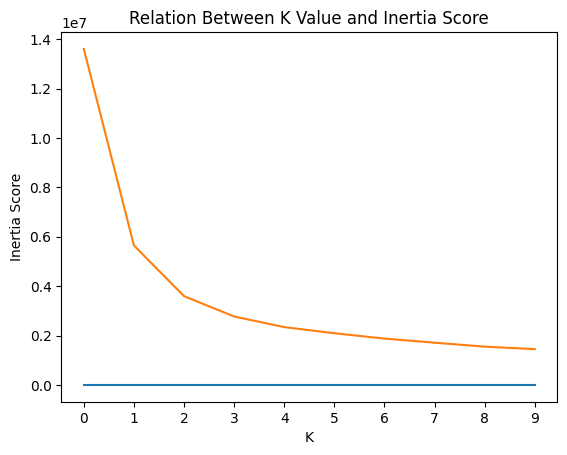

In [5]:
testScores = list()
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(features)
    inertia_score = model.inertia_
    testScores.append((k, inertia_score))

feature_df = pd.DataFrame(testScores, columns=['K','Inertia Score'])


feature_df.plot(title='Relation Between K Value and Inertia Score', xlabel='K', ylabel='Inertia Score', xticks=range(0,10,1), legend=None)
# Elbow at k=3

In [6]:
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(features)
df['cluster'] = cluster_labels

cluster_one = df[df.cluster == 0]
cluster_two = df[df.cluster == 1]
cluster_three = df[df.cluster == 2]

# Cluster Information

In [7]:
print('Cluster 1 Average Scores')
# print('Math: ' + str(cluster_one['MathScore'].mean()))
# print('Reading: ' + str(cluster_one['ReadingScore'].mean()))
# print('Writing: ' + str(cluster_one['WritingScore'].mean()))
print('Avgerage Test Score: ' + str(cluster_one['AvgScore'].mean()))

Cluster 1 Average Scores
Avgerage Test Score: 84.54195937482983


In [8]:
print('Cluster 2 Average Scores')
# print('Math: ' + str(cluster_two['MathScore'].mean()))
# print('Reading: ' + str(cluster_two['ReadingScore'].mean()))
# print('Writing: ' + str(cluster_two['WritingScore'].mean()))
print('Avgerage Test Score: ' + str(cluster_two['AvgScore'].mean()))

Cluster 2 Average Scores
Avgerage Test Score: 49.358499824745884


In [10]:
print('Cluster 3 Average Scores')
# print('Math: ' + str(cluster_three['MathScore'].mean()))
# print('Reading: ' + str(cluster_three['ReadingScore'].mean()))
# print('Writing: ' + str(cluster_three['WritingScore'].mean()))
print('Avgerage Test Score: ' + str(cluster_three['AvgScore'].mean()))

Cluster 3 Average Scores
Avgerage Test Score: 67.08489701605512


In [ ]:
# Changing Cluster 3 Values back to Original
cluster_three['TestPrep'] = cluster_three['TestPrep'].replace({0: 'none', 1: 'completed'})
cluster_three['PracticeSport'] = cluster_three['PracticeSport'].replace({0: 'never', 0.5: 'sometimes', 1: 'regularly'})
cluster_three['LunchType'] = cluster_three['LunchType'].replace({0: 'free/reduced', 1: 'standard'})
cluster_three['ParentEduc'] = cluster_three['ParentEduc'].replace({1: 'some high school', 2: 'high school', 3: 'some college', 4: 
                                                                   'associate\'s degree', 5: 'bachelor\'s degree', 6: 'master\'s degree'})
cluster_three['ParentMaritalStatus'] = cluster_three['ParentMaritalStatus'].replace({0.25: 'single', 0.50: 'widowed', 0.75: 'divorced', 1: 'married'})
cluster_three['TransportMeans'] = cluster_three['TransportMeans'].replace({0: 'private', 1: 'school_bus'})
cluster_three['WklyStudyHours'] = cluster_three['WklyStudyHours'].replace({2.5: '< 5', 7.5: '5 - 10', 10: '> 10'})
cluster_three['IsFirstChild'] = cluster_three['IsFirstChild'].replace({0: 'no', 1: 'yes'})

In [15]:
for feature in features:
    if feature != 'MathScore' and feature != 'ReadingScore' and feature != 'WritingScore':
        print(cluster_three[feature].value_counts())
        print('----------------')

TestPrep
none         5651
completed    2716
Name: count, dtype: int64
----------------
PracticeSport
sometimes    4241
regularly    2961
never        1165
Name: count, dtype: int64
----------------
LunchType
standard        5413
free/reduced    2954
Name: count, dtype: int64
----------------
ParentEduc
some college          1991
high school           1710
some high school      1607
associate's degree    1586
bachelor's degree      975
master's degree        498
Name: count, dtype: int64
----------------
ParentMaritalStatus
married     4783
single      2024
divorced    1419
widowed      141
Name: count, dtype: int64
----------------
NrSiblings
1.0    2376
2.0    1988
3.0    1751
0.0     867
4.0     859
5.0     361
7.0      86
6.0      79
Name: count, dtype: int64
----------------
TransportMeans
school_bus    5007
private       3360
Name: count, dtype: int64
----------------
WklyStudyHours
5 - 10    4550
< 5       2387
> 10      1430
Name: count, dtype: int64
----------------
IsFirstChi

<H2> Linear Regression Model </H2>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [18]:
features = df[['TestPrep', 'PracticeSport', 'LunchType', 'ParentEduc', 'ParentMaritalStatus','NrSiblings', 'TransportMeans', 'WklyStudyHours', 'IsFirstChild']]
target = df['AvgScore']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse) # How off the predicted scores are from the actual

Root Mean Squared Error (RMSE): 13.038651601894056


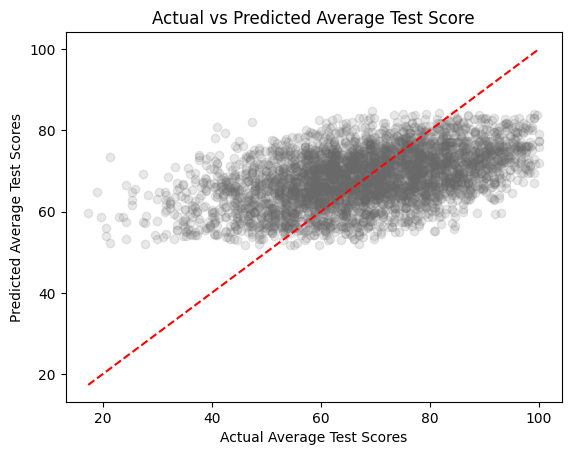

In [20]:

plt.scatter(y_test, y_pred, color='dimgray', alpha=0.15, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Average Test Score')
plt.xlabel('Actual Average Test Scores')
plt.ylabel('Predicted Average Test Scores')
plt.show()